## DON'T FORGET TO ADD YOUR USERNAME AND PASSWORD

## Please visit webdriver session after executing each block

# to start webdriver session


In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException
import time
driver=webdriver.Chrome(executable_path="/home/vishesh/Documents/chromedriver")  ## set executable path
driver.get("https://www.instagram.com/")

# login()

In [2]:
def login():
    username=driver.find_element_by_name("username")
    username.send_keys("sample")    ## here replace sample by your user-name
    
    password=driver.find_element_by_name("password")
    password.send_keys("sample")   ### here replace sample by your password
    
    ### clicking on submit button
    
    button=driver.find_element_by_xpath("//*[@id='react-root']/section/main/article/div[2]/div[1]/div/form/div[4]/button")
    button.submit()
    
    time.sleep(6)
    
    # to handle notifications pop-up(may depend on individual id)
    
    try:
        driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/div/div/div/button').click() 
    except NoSuchElementException:
        pass
    time.sleep(1)
    try:
        driver.find_element_by_xpath("/html/body/div[4]/div/div/div[3]/button[2]").click() 
    except NoSuchElementException:
        pass

login()

# 1 
## Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

## 1.1
## From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [3]:
def food_handles():
    
    driver.get("https://www.instagram.com/")
    
    ## finding search bar and sending "food" as keys
    
    field=driver.find_element_by_xpath("//*[@id='react-root']/section/nav/div[2]/div/div/div[2]/input")
    field.send_keys("food")
    
    time.sleep(2)
    ig_handles=driver.find_elements_by_xpath("/html/body/div[1]/section/nav/div[2]/div/div/div[2]/div[2]/div[2]/div/a")
    
    link_handles=[] ## saving link to first 10 handles!
    
    for i in ig_handles:
        
        ## removing hashtags and locations 
        
        if ("explore/tags" not in str(i.get_attribute("href"))) and "explore/locations" not in str(i.get_attribute("href")):
            link_handles.append(i.get_attribute("href"))
    
    global final_list
    
    final_list=[]
    
    ## loop to move through 10 i_g handles
    
    for handle in range(10):
        
        driver.get(link_handles[handle])
        
        time.sleep(3)
        
        ## finding followers element
        
        follower_link=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/ul/li[2]/a/span')
        
        numfollowers=follower_link.get_attribute('title')
        
        handle_name=driver.find_element_by_xpath('//*[@id="react-root"]/section/main/div/header/section/div[1]/h2').text
        
        ## getting number of followers in int datatype
        ## also number of followers are given in comma separated from like 123,456,12
        ## so removing commas also
        
        if ',' in numfollowers:
            str_data=numfollowers.split(",")
            integer_ans=int(str_data[0]+str_data[1])
        else:
            integer_ans=int(str_data[0])
            
        final_list.append([integer_ans,handle_name,link_handles[handle]])
    
    ## sorting in reverse order 
    
    final_list.sort(reverse=True)
    
    final_list=final_list[0:5]
    
    ## printing 
    for i in final_list:
        print(i[1].strip()," ",i[0])
        print()
    
    
    driver.get("https://www.instagram.com/")

    
    
food_handles()

dilsefoodie   455453

foodtalkindia   295746

foodie_incarnate   189583

foodchoiceofmumbai   54362

food   32303



## 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [6]:
from datetime import date

today =str(date.today())                  ## knowing today's date

count_posts=[]                          ## list to save count of posts w.r.t handles

for handle in final_list:              ## loop to move through each of 5 handles
    
    driver.get(handle[2])
    time.sleep(2)
    count=0
                                     ###SCROLLING to have atleast first 30 posts    
    
    current=driver.execute_script("return document.body.scrollHeight;")
    
    driver.execute_script("window.scrollTo(0,arguments[0]);",current)
    
    time.sleep(2)
                                       ### find link to all posts available on page
    
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')
    
    for post in posts:                ## loop to move through each post
        
        post.click()
        time.sleep(4)
                                       ## finding time tag of the post after clicking the post
        
        date=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/div[2]/a/time')
                             
                                          ## getting date from time tag
        
        post_date=date.get_attribute("datetime")[:10]
        
                                         ## taking decisions to decide for previous 3 days
        
        if int(today[:4])==int(post_date[:4]) and int(today[5:7])==int(post_date[5:7]):
            
            if(int(today[8:10])-int(post_date[8:10])<=3):

                count+=1
            
        else:
            count_posts.append([count,handle[1]])
            break
        
         ### finding close button
        
        close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)

            
for row in count_posts:
    print(row[1]," ",row[0])

driver.get("https://www.instagram.com/")

dilsefoodie   3
foodtalkindia   4
foodie_incarnate   5
foodchoiceofmumbai   10
food   5


## 1.3 Depict this information using a suitable graph.


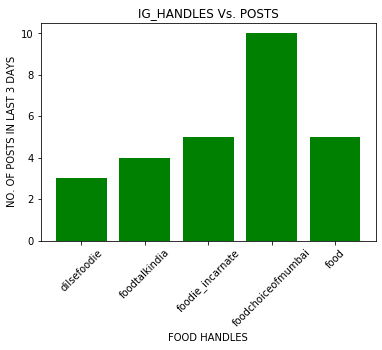

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## converting to numpy array so to use advance indexing
count_posts=np.array(count_posts)

Y=np.array(count_posts[:,0],dtype=int)

X=count_posts[:,1]

plt.xlabel("FOOD HANDLES")

plt.ylabel("NO. OF POSTS IN LAST 3 DAYS")

plt.title("IG_HANDLES Vs. POSTS")

plt.xticks(rotation=45)


plt.bar(X,Y, color="green")

plt.show()

# 2. Your friend also needs a list of hashtags that he should use in his posts.

## 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [44]:
words=[]

for handle in final_list:              ## loop to move through each of 5 handles
    
    driver.get(handle[2])
    time.sleep(3)
                                       ### find link to all posts available on page
    
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')
    
    for post in posts[0:10]:                ## loop to move through each of 10 posts
        
        post.click()
        time.sleep(4)
        
                                       ## finding hashtags mentioned on the post
        try:
            hashtags=driver.find_elements_by_class_name("xil3i")
            for hashtag in hashtags:
                words.append(hashtag.text)    ## appending hashtags text
            
        except NoSuchElementException:
            pass
        
        ### finding close button
        
        close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)

            
print(words)  ## just printing words to let u know that i have got the words!
time.sleep(1)
driver.get("https://www.instagram.com/") ## visiting home-page

['#dilsefoodie', '#arjunpavbhaji', '#dilsefoodie', '#LaalMaas', '#dilsefoodie', '#food', '#golgappe', '#dilsefoodie', '#food', '#jaipur', '#dilsefoodie', '#JeeraAloo', '#dilsefoodie', '#dilsefoodie', '#chickenkorma', '#dilsefoodie', '#food', '#guitar', '#dilsefoodie', '#food', '#frenchtoast', '#dilsefoodie', '#Food', '#odisha', '#dilsefoodie', '#nanahotel', '#HappyCheeseDay', '#foodtalk', '#foodtalkindia', '#stayhappy', '#socialdistancing', '#lockdown', '#staypositive', '#grocery', '#quarantine', '#quarantinemanagement', '#quarantine2020', '#cheese', '#bluecheese', '#mozarella', '#feta', '#cheeseday', '#kindsofcheese', '#cheddar', '#gorgonzola', '#tbh', '#foodtalk', '#foodtalkindia', '#stayhappy', '#socialdistancing', '#lockdown', '#staypositive', '#grocery', '#quarantine', '#quarantinemanagement', '#quarantine2020', '#orderfood', '#zomato', '#netflixandchill', '#foodtalk', '#foodtalkindia', '#worldcocktailday', '#cocktails', '#cocktailguide', '#delhinightlife', '#cocktailbars', '#cock

## 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [45]:
dic={}                ## preparing dictionary to store frequency of words 
for word in words:
    dic[word]=dic.get(word,0)+1
    
                      ## converting dict to list
word_list=[]
for word in dic:
    if word!="":
        word_list.append([dic[word],word])
    
word_list.sort(reverse=True)   ### sorting the list to get most common hashtag on top!

for row in word_list:
    print(row)

[14, '#indianfoodbloggers']
[13, '#mumbaifoodie']
[13, '#dilsefoodie']
[12, '#mumbaifood']
[12, '#foodtalkindia']
[11, '#mumbaifoodblogger']
[11, '#mumbaidiaries']
[10, '#things2doinmumbai']
[10, '#sodelhi']
[10, '#newdelhi']
[10, '#munchymumbai']
[10, '#mumbai_igers']
[10, '#indianfood']
[10, '#foodofmumbai']
[10, '#delhigram']
[9, '#mymumbai']
[9, '#desifood']
[8, '#mumbaistreetfood']
[8, '#mumbaifoodlovers']
[8, '#mumbaifoodies']
[8, '#foodbossindia']
[8, '#food']
[7, '#trelltalemumbai']
[7, '#trellfood']
[7, '#mumbaiblogger']
[7, '#lbb']
[7, '#foodmaniacindia']
[7, '#foodieincarnate']
[7, '#delhifood']
[6, '#yum']
[6, '#punefoodies']
[6, '#indianstreetfood']
[5, '#trellingfood']
[5, '#thingstodoinmumbai']
[5, '#mumbaikar']
[5, '#mumbaifoodicious']
[5, '#mumbai_uncensored']
[5, '#foodiliciousmumbai']
[5, '#foodchoiceofmumbai']
[5, '#delhifoodie']
[5, '#delhifoodblogger']
[4, '#trellingmumbai']
[4, '#thegreatindianfoodie']
[4, '#sandwich']
[4, '#punefoodie']
[4, '#instamumbai']
[4, '

## 2.3 Create a csv file with two columns : the word and its frequency

In [46]:
import pandas as pd
csv_file=pd.DataFrame(word_list,columns=["Frequency","Words"]) ## creating dataframe
csv_file.to_csv("words_frequency.csv",index=False)  ## saving dataframe in same directory 
csv_file

,Frequency,Words
0,14,#indianfoodbloggers
1,13,#mumbaifoodie
2,13,#dilsefoodie
3,12,#mumbaifood
4,12,#foodtalkindia
...,...,...
348,1,#ahmedabab
349,1,#LaalMaas
350,1,#JeeraAloo
351,1,#HappyCheeseDay


## 2.4 Now, find the hashtags that were most popular among these bloggers

In [47]:
print(word_list[0][1])  ## since word_list is already sorted so first row will give us most used hashtag

#indianfoodbloggers


## 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

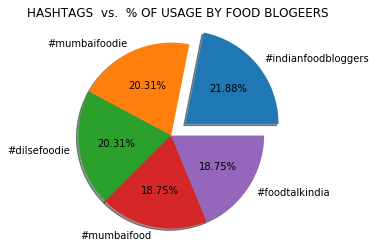

In [48]:
word_list=np.array(word_list) ## converting to numpy so that we can use advance indexing easily

sizes=np.array(word_list[:5,0],dtype=int)

plt.pie(sizes,labels=word_list[:5,1],autopct="%.2f%%",explode=[0.2,0,0,0,0],shadow=True)

plt.axis("equal")

plt.title("HASHTAGS  vs.  % OF USAGE BY FOOD BLOGEERS")

plt.show()

# 3. 
## You need to also calculate average followers : likes ratio for the obtained handles.
## Followers : Likes ratio is calculated as follows:

## 3.1 
## Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [49]:
total_likes=[]

for handle in final_list:              ## loop to move through each of 5 handles
    likes_handle=0
    driver.get(handle[2])
    time.sleep(3)
                                       ### find link to all posts available on page
    
    posts=driver.find_elements_by_xpath('//*[@id="react-root"]/section/main/div/div[3]/article/div[1]/div//a')
    
    for post in posts[0:10]:                ## loop to move through each of 10 posts
        
        post.click()
        time.sleep(4)
        
        ## somewhere likes are obtained by clicking on view button-- this is covered in try: statement
        
        try:
            views=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/span')
            
            views.click()  ## clicking on view button 
            
            likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/div[4]/span').text
            
            likes=likes.strip().split(",")
            
            if len(likes)==1:
                likes=int(likes[0])
            
            else:
                likes=int(likes[0]+likes[1])
            
            likes_handle+=likes
            
            driver.find_element_by_xpath('/html/body/div[4]').click()  ## just clicking anywhere to get to original post
            
        ## and somewhere directly likes are written-----> so this is covered here in except statement
        
        except NoSuchElementException:
            
            likes=driver.find_element_by_xpath('/html/body/div[4]/div[2]/div/article/div[2]/section[2]/div/div/button/span').text
            
            likes=likes.strip().split(",")
            
            if len(likes)==1:
                likes=int(likes[0])
            else:
                likes=int(likes[0]+likes[1])
            
            likes_handle+=likes

            ### finding close button
        
        close=driver.find_element_by_xpath("/html/body/div[4]/div[3]/button")
        close.click()
        time.sleep(1)

    
    total_likes.append([likes_handle,handle[1]])
    

print(total_likes)

driver.get("https://www.instagram.com/") ## visiting home-page

[[90871, 'dilsefoodie'], [7926, 'foodtalkindia'], [75990, 'foodie_incarnate'], [23365, 'foodchoiceofmumbai'], [8585, 'food']]


## 3.2 Calculate the average likes for a handle.

In [50]:
average_likes=[]

for row in total_likes:
    
    avg=row[0]//10            ## dividing each element by 10 to get average likes per handle
    
    average_likes.append([avg,row[1]])  ## preparing  list of average likes and handles
    
for row in average_likes:        ## printing average like per handle
    print(row[1]," ",row[0])

dilsefoodie   9087
foodtalkindia   792
foodie_incarnate   7599
foodchoiceofmumbai   2336
food   858


## 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [51]:
average_likes=np.array(average_likes)  ## converting to numpy to use advance indexing

final_list=np.array(final_list)

followers=np.array(final_list[:,0],dtype=int)    ## getting number of followers

avg_likes=np.array(average_likes[:,0],dtype=int)  ## getting avg_likes

numRatio=followers/avg_likes  ### calculating followers : like ratio    

ratio_per_handle=[]

for i in range(5):      ## preparing a list                                                     
    
    ratio_per_handle.append([float(format(numRatio[i],".2f")),final_list[i,1]])
    
for row in ratio_per_handle:  ## printing handles and respective ratio

    print(row[1]," ",row[0])

dilsefoodie   50.12
foodtalkindia   373.42
foodie_incarnate   24.95
foodchoiceofmumbai   23.27
food   37.65


## 3.4 Create a bar graph to depict the above obtained information.

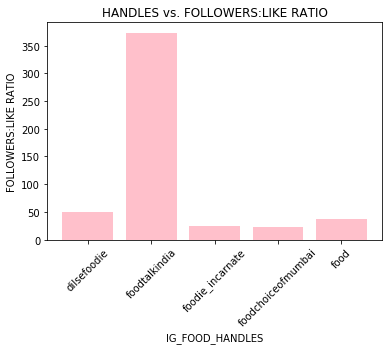

In [52]:
handles=final_list[:,1]      ## getting handle names from final_list obtained in 1st question
plt.bar(handles,numRatio,color="pink")
plt.title("HANDLES vs. FOLLOWERS:LIKE RATIO")
plt.xlabel("IG_FOOD_HANDLES")
plt.ylabel("FOLLOWERS:LIKE RATIO")
plt.xticks(rotation=45)
plt.show()

In [ ]:
driver.close()